# Looking at cross section data in an ENDF file
## Overview

Cross section data in an ENDF file is stored in what is referred to as MF3 (aka 'file 3'). The format of each section in MF3 is relatively simple: it consists of a single ENDF record that gives tabulated energy and cross section values along with the associated interpolation data (this record is known as a TAB1 record). In addition to these data, an MF3 section also gives us the following:
- the ZA value of the target nuclide
- AWR: the atomic weight ratio of the target nuclide with respect to the neutron mass
- QI: the reaction Q-value
- QM: the mass-difference Q-value associated to the reaction
- LR: the complex break-up flag, which indicates that additional particles not specified by the reaction will be emitted (an example here would be decay of Be8 into two alpha particles)

The following is an example of the raw content of an unparsed MF3 section (in this case the n,4n cross section data for Pu239):

In [1]:
import ENDFtk

tape = ENDFtk.tree.Tape.from_file( 'resources/n-Pu239.endf' )
section = tape.material( 9437 ).section( 3, 37 )
xs = section.parse()

print( section.content )

 9.423900+4 2.369986+2          0          0          0          09437 3 37    1
-1.850830+7-1.850830+7          0          0          1         109437 3 37    2
         10          2                                            9437 3 37    3
 1.858640+7 0.000000+0 1.860000+7 6.360548-8 1.880000+7 9.989802-79437 3 37    4
 1.900000+7 1.934355-6 1.920000+7 8.517429-5 1.940000+7 1.684142-49437 3 37    5
 1.950000+7 2.100342-4 1.960000+7 2.775573-4 1.980000+7 4.126035-49437 3 37    6
 2.000000+7 5.476497-4                                            9437 3 37    7
                                                                  9437 3  099999



ENDFtk provides us with an abstracted interface that allows us access to the data in the MF3 section without having to know where the data exactly is in the ENDF record. The energy and cross section values can be extracted with the following interface:

In [2]:
number_points = xs.NP
energies = xs.energies
values = xs.cross_sections

The interpolation data for the cross section data can be retrieved with the following interface:

In [3]:
number_ranges = xs.NR
boundaries = xs.boundaries
interpolants = xs.interpolants

The additional data (the Q-values, AWR, etc.) can be retrieved with the following interface:

In [4]:
za = xs.target_identifier
awr = xs.atomic_weight_ratio
qm = xs.mass_difference_qvalue
qi = xs.reaction_qvalue
lr = xs.complex_breakup

za = xs.ZA
awr = xs.AWR
qm = xs.QM
qi = xs.QI
lr = xs.LR

## Application 1: extracting and reformatting cross section data
This is a very simple example where we extract the cross section data from a file for a given reaction and just reformat the data into a more human readable table. In this particular example, we are looking at n,4n in Pu239 at 0 K.

In [5]:
import ENDFtk

tape = ENDFtk.tree.Tape.from_file( 'resources/n-Pu239.endf' )

# extract the n,4n cross section for Pu239
section = tape.material( 9437 ).section( 3, 37 ).parse()

# print out a cross section table
print( '{:^12} | {:^12}'.format( 'energy', 'xs' ) )
print( '{:12} | {:12}'.format( '-' * 12, '-' * 12 ) )
for energy, value in zip( section.energies, section.cross_sections ) :
    
    print( '{:12.5e} | {:12.5e}'.format( energy, value ) )

   energy    |      xs     
------------ | ------------
 1.85864e+07 |  0.00000e+00
 1.86000e+07 |  6.36055e-08
 1.88000e+07 |  9.98980e-07
 1.90000e+07 |  1.93435e-06
 1.92000e+07 |  8.51743e-05
 1.94000e+07 |  1.68414e-04
 1.95000e+07 |  2.10034e-04
 1.96000e+07 |  2.77557e-04
 1.98000e+07 |  4.12604e-04
 2.00000e+07 |  5.47650e-04


## Application 2: plotting cross section data
One of the most common things a user wants to do with cross section data is simply looking at the data. The following example illustrates how we can use plotting utilities in Python to plot cross section data from several ENDF files. This particular case plots the total cross section for 5 nuclides (O16, U238, Pu239, Pu240 and Pu242) at 0 K.

In [6]:
# use interactive plotting
# ensure that ipympl is installed -> "conda install -c conda-forge ipympl" (for anaconda)
# restart jupyter if required
%matplotlib widget

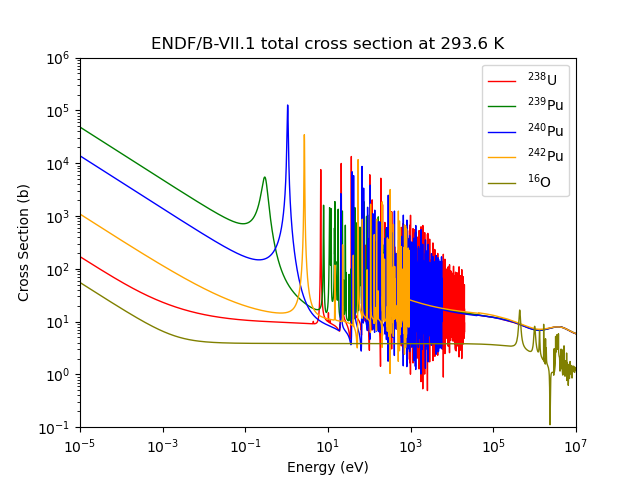

In [7]:
import ENDFtk
import matplotlib.pyplot as plot

mt = 1 # MT = 1 is the total cross section

# open the ENDF file for each nuclide, get the reaction cross section and parse the data
U238 = ENDFtk.tree.Tape.from_file( 'resources/n-U238.endf' ).material( 9237 ).file( 3 ).section( mt ).parse()
Pu239 = ENDFtk.tree.Tape.from_file( 'resources/n-Pu239.endf' ).material( 9437 ).file( 3 ).section( mt ).parse()
Pu240 = ENDFtk.tree.Tape.from_file( 'resources/n-Pu240.endf' ).material( 9440 ).file( 3 ).section( mt ).parse()
Pu242 = ENDFtk.tree.Tape.from_file( 'resources/n-Pu242.endf' ).material( 9446 ).file( 3 ).section( mt ).parse()
O16 = ENDFtk.tree.Tape.from_file( 'resources/n-O16.endf' ).material( 825 ).file( 3 ).section( mt ).parse()

# plot the data
plot.figure()
plot.plot( U238.energies, U238.cross_sections, label = '${}^{238}$U', color = 'red', linewidth = 1.0 )
plot.plot( Pu239.energies, Pu239.cross_sections, label = '${}^{239}$Pu', color = 'green', linewidth = 1.0 )
plot.plot( Pu240.energies, Pu240.cross_sections, label = '${}^{240}$Pu', color = 'blue', linewidth = 1.0 )
plot.plot( Pu242.energies, Pu242.cross_sections, label = '${}^{242}$Pu', color = 'orange', linewidth = 1.0 )
plot.plot( O16.energies, O16.cross_sections, label = '${}^{16}$O', color = 'olive', linewidth = 1.0 )
plot.xlabel( 'Energy (eV)' )
plot.ylabel( 'Cross Section (b)' )
plot.title( 'ENDF/B-VII.1 total cross section at 293.6 K' )
plot.xlim( 1e-5, 10e+6 )
plot.ylim( 1e-1, 1e+6 )
plot.xscale( 'log' )
plot.yscale( 'log' )
plot.legend()
plot.show()